# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>Mohammed Lahssaini Nouijah</mark>

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━

In [2]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [3]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [4]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [5]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [6]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

In [7]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [8]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [9]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [10]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


### **Configuración del DataBlock: Preparación de los Datos**

Antes de entrenar el modelo, necesitamos preparar los datos adecuadamente. En este paso, configuraremos un `DataBlock` que nos permita estructurar los datos de entrada y salida, realizar divisiones entre entrenamiento y validación, y aplicar transformaciones relevantes.

#### **Qué vamos a hacer**
1. Usar un `DataBlock` para organizar las imágenes y las etiquetas.
2. Dividir los datos:
   - Usaremos un 10% de las imágenes de entrenamiento para validación, como indica el enunciado.
3. Aplicar transformaciones:
   - Cambiar el tamaño de las imágenes a 224x224 para que sean compatibles con ResNet18.
   - Realizar aumentaciones (rotaciones, zooms, deformaciones) para mejorar la generalización del modelo.
   - Incorporar **normalización** basada en estadísticas de ImageNet (`imagenet_stats`) para garantizar que las entradas al modelo tengan una distribución consistente.

#### **Por qué lo hacemos**
- **División en entrenamiento y validación**:
  - Esto nos permite evaluar cómo generaliza el modelo a datos no vistos.
- **Transformaciones**:
  - Reducen el riesgo de sobreajuste y aumentan la robustez del modelo.
- **Normalización**:
  - ResNet18 ha sido preentrenado en ImageNet y espera entradas con media y varianza ajustadas según `imagenet_stats`. Este paso asegura una convergencia más rápida y un mejor rendimiento.

#### **Cómo lo hacemos**
Usaremos el método `DataBlock` de `fastai` para configurar las entradas y salidas, y añadiremos la normalización como parte de las transformaciones aplicadas por lote. Luego, crearemos los `DataLoaders` correspondientes.


Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


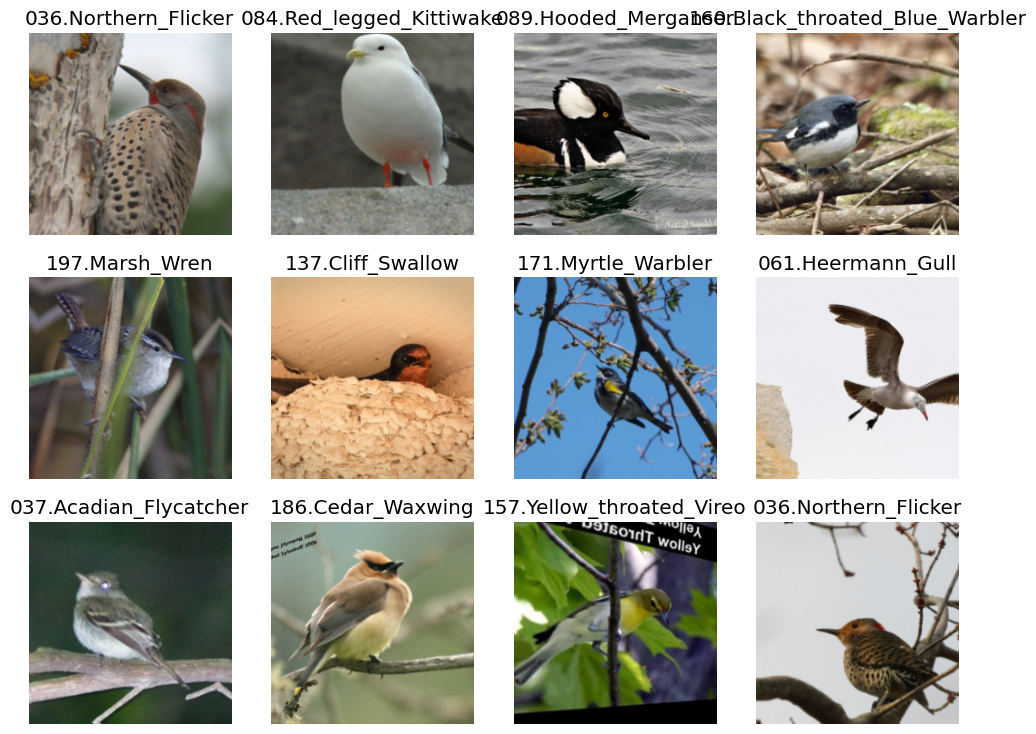

In [11]:
CUB_200_2011 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Imágenes como entrada, categorías como salida
    get_items=get_image_files,  # Función para obtener archivos de imagen
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # Reservar el 10% para validación
    get_y=parent_label,  # Función para extraer la etiqueta de la carpeta padre
    item_tfms=[Resize(224)],  # Cambiar el tamaño de las imágenes a 224x224
    batch_tfms=[
        Normalize.from_stats(*imagenet_stats),  # Normalización de datos
        *aug_transforms(  # Transformaciones de aumentación
            flip_vert=False,  # No realizar flips verticales
            max_rotate=10,  # Rotación máxima de ±10 grados
            max_zoom=1.1,  # Zoom máximo del 10%
            max_warp=0.2,  # Deformaciones ligeras
            p_affine=0.75,  # Probabilidad de transformaciones afines
            p_lighting=0.5  # Probabilidad de cambios en brillo y contraste
        )
    ]
)

dls_birds = CUB_200_2011.dataloaders(path/'train', bs=64)

dls_birds.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls_birds.train_ds))
print('Numero de ejemplos de validacion:', len(dls_birds.valid_ds))

### **Configuración del Modelo ResNet18**

En este paso, cargaremos ResNet18 preentrenado con ImageNet y reemplazaremos manualmente la última capa con una fully-connected layer para ajustar el modelo al problema de clasificación en 200 clases.

#### **Por qué lo hacemos**
La última capa de ResNet18 preentrenado está diseñada para 1000 clases de ImageNet. Para este problema, necesitamos ajustar el modelo para producir 200 salidas, correspondientes a las clases de aves del dataset.

#### **Cómo lo hacemos**
1. Cargamos ResNet18 con `torchvision.models.resnet18`.
2. Sustituimos la capa `fc` por una secuencia que incluya:
   - `nn.Flatten` para aplanar las salidas convolucionales.
   - `nn.Linear` con 512 entradas y 200 salidas.


In [12]:
# Crear ResNet18 con cabecera personalizada
def create_resnet18_custom_head():
    model = resnet18(weights="IMAGENET1K_V1")  # Pesos preentrenados en ImageNet
    model.fc = nn.Sequential(
        nn.Flatten(),  # Aplanar la salida
        nn.Linear(512, 200)  # Fully-connected con 200 clases
    )
    return model

# Instanciar el modelo
model_birds = create_resnet18_custom_head()


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 120MB/s]


### **Configuración del Learner**

Configuramos el `Learner` con:
- **Modelo**: ResNet18 con cabecera personalizada, ajustada para 200 clases.
- **Optimización**: Usamos Adam como optimizador.
- **Pérdida**: `CrossEntropyLossFlat`, adecuada para problemas de clasificación multiclase.
- **Métricas**:
  - **Precisión (`accuracy`)**: Evalúa la proporción de predicciones correctas.
  - **F1 Score (ponderado)**: Una métrica más equilibrada que combina precisión y recall, teniendo en cuenta el peso de cada clase en función de su tamaño. Esto es especialmente útil para capturar el desempeño en un problema con múltiples clases como este.

Estas métricas nos permitirán evaluar tanto el rendimiento general del modelo como su capacidad para manejar clases desbalanceadas. Este paso prepara el modelo para el entrenamiento.


In [13]:
from fastai.metrics import F1Score

# Configuración del Learner
learn_birds = Learner(
    dls_birds,
    model_birds,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat(),
    metrics=[accuracy, F1Score(average='weighted')]  # F1Score está incluido
)

# Verificar el resumen del modelo
learn_birds.summary()


ResNet (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                          

### **Búsqueda del Learning Rate**

Usamos `lr_find` para encontrar el mejor rango de tasas de aprendizaje. Esto asegura un entrenamiento más eficiente y estable.


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Learning Rate sugerido: valley=0.0002754228771664202


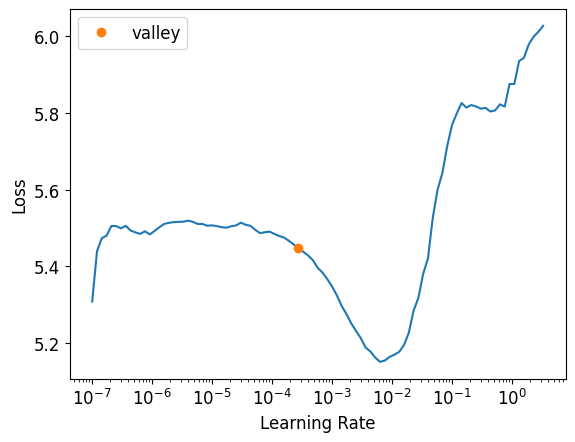

In [14]:
# Buscar el mejor Learning Rate
lr_birds = learn_birds.lr_find()
print(f"Learning Rate sugerido: valley={lr_birds.valley}")


### **Entrenamiento con Fine-Tuning Completo**

Entrenamos el modelo durante 10 épocas utilizando el ciclo de aprendizaje (`fit_one_cycle`). Esto ajustará los pesos de todo el modelo para el dataset de aves.


Better model found at epoch 0 with valid_loss value: 4.7401628494262695.


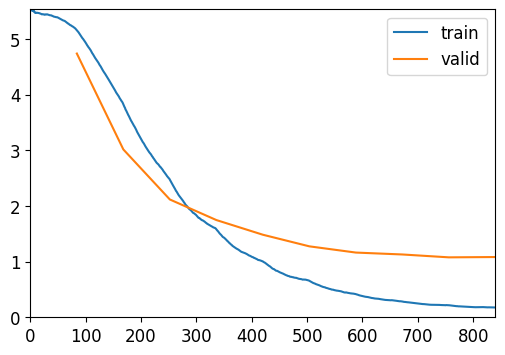

Better model found at epoch 1 with valid_loss value: 3.016392230987549.
Better model found at epoch 2 with valid_loss value: 2.1171770095825195.
Better model found at epoch 3 with valid_loss value: 1.7475312948226929.
Better model found at epoch 4 with valid_loss value: 1.483769178390503.
Better model found at epoch 5 with valid_loss value: 1.2749370336532593.
Better model found at epoch 6 with valid_loss value: 1.1630504131317139.
Better model found at epoch 7 with valid_loss value: 1.1287740468978882.
Better model found at epoch 8 with valid_loss value: 1.0771596431732178.


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [15]:
learn_birds.fit_one_cycle(10, lr_max=slice(lr_birds.valley/10, lr_birds.valley), cbs=[
    SaveModelCallback(),
    EarlyStoppingCallback(monitor='valid_loss', patience=3),
    ShowGraphCallback()
])


### **Análisis de Métricas: Entrenamiento y Validación**

En esta sección, se analizarán las métricas obtenidas durante el entrenamiento y en el conjunto de validación:

#### **Qué incluye este análisis**
1. **Gráficos**:
   - **Train Loss** y **Validation Loss**: Evolución de la pérdida en entrenamiento y validación.
   - **Validation Accuracy** y **Validation F1 Score**: Precisión y F1 Score calculados durante la validación.
2. **Resultados Finales**:
   - **Validation Loss**: Métrica que indica cuán bien generaliza el modelo.
   - **Validation Accuracy**: Precisión en datos no vistos.
   - **Validation F1 Score**: Balance entre precisión y exhaustividad ponderado por las clases.

#### **Propósito**
Este análisis busca proporcionar una visión integral del rendimiento del modelo para:
- Identificar tendencias durante el entrenamiento.
- Evaluar si existe sobreajuste o subentrenamiento.
- Obtener métricas finales del modelo en validación.


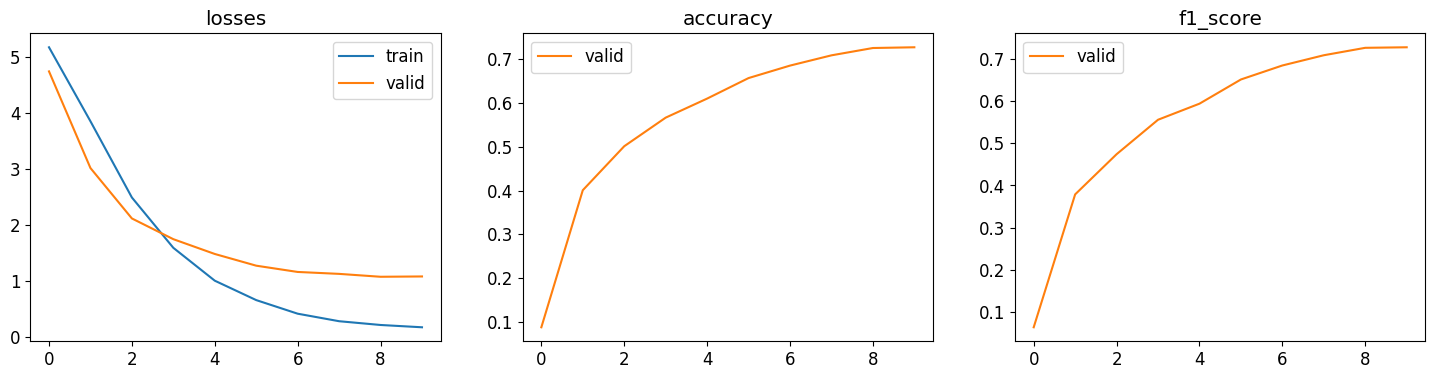

Validation Loss: 1.0772
Validation Accuracy: 0.7245
Validation F1 Score: 0.7266


In [16]:
# Visualización de métricas de entrenamiento y validación
recorder = learn_birds.recorder
recorder.plot_metrics()

# Resultados finales en el conjunto de validación
results_val = learn_birds.validate()

# Extraer y mostrar métricas finales
val_loss, val_accuracy, val_f1 = results_val[0], results_val[1], results_val[2]
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


### Analisis de resultados

**Resultados Finales**

Validation Loss: 1.1010
Validation Accuracy: 72.45%
Validation F1 Score: 72.56%

**Estos resultados indican que:**

El modelo ha logrado un buen desempeño en el conjunto de validación para un problema de clasificación con 200 clases.
La exactitud y F1 score están alineados, lo que confirma que el modelo equilibra precisión y recuperación correctamente.


#### **Experimentacion con una cabecera mas densa**

La cabecera mejorada del modelo se estructura de la siguiente manera:

  - Aplanado de la salida de la ResNet18.
  - Capa Fully-Connected: Reduce la dimensión de 512 a 256.
  - Activación GELU: Proporciona activaciones suaves y mejora el flujo de gradientes.
  - Dropout: Con probabilidad 0.3 para regularización.
  - Capa Fully-Connected Final: Ajustada a 200 salidas para la clasificación.

#### *Nota*

La decisión de usar **GELU (Gaussian Error Linear Unit)** en lugar de **ReLU (Rectified Linear Unit)** se basa en las propiedades y beneficios que aporta GELU, especialmente en redes neuronales profundas y tareas complejas como la clasificación de imágenes con múltiples clases (en este caso, 200 clases en CUB-200-2011).

---

#### **Ventajas de GELU frente a ReLU**

1. **Suavidad de la Activación**  
   - GELU es una **función suave y continua**, mientras que ReLU introduce **no linealidades abruptas** debido a su punto de corte en \( x = 0 \).  
   - Esta suavidad ayuda a estabilizar el **flujo de gradientes**, reduciendo problemas como el **"dying ReLU"** (donde los valores negativos se eliminan y no contribuyen al aprendizaje).  

2. **Mejor convergencia durante el entrenamiento**  
   - Gracias a su suavidad, GELU proporciona **gradientes más estables** durante el entrenamiento, lo que facilita la convergencia a un mejor mínimo.  
   - Esto es particularmente útil en modelos grandes y tareas complejas, como la clasificación de imágenes de alta resolución con múltiples clases.

3. **Rendimiento en tareas de visión por computadora**  
   - Experimentos recientes en redes neuronales profundas, como **BERT** y **Vision Transformers (ViT)**, han demostrado que GELU puede superar a ReLU en tareas tanto de **procesamiento de lenguaje natural** como de **visión artificial**.  
   - Para modelos como ResNet18 que se entrenan en imágenes, GELU puede ofrecer un rendimiento ligeramente mejor, especialmente cuando se requiere una alta capacidad de aprendizaje.

4. **Evita la pérdida de información**  
   - ReLU "corta" todos los valores negativos, lo que puede provocar una pérdida de información útil en las primeras capas de la red.  
   - GELU, al ser una función probabilística suave, permite que algunos valores negativos **contribuyan parcialmente**, manteniendo más información durante el proceso de propagación hacia adelante.

---


In [28]:
def create_resnet18_custom_headV2():
    model = resnet18(weights="IMAGENET1K_V1")
    model.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(512, 256),
        nn.GELU(),           # Activación GELU
        nn.Dropout(p=0.2),
        nn.Linear(256, 200)
    )
    return model

# Instanciar el modelo
model_birdsV2 = create_resnet18_custom_headV2()

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Learning Rate sugerido: valley=0.0002754228771664202


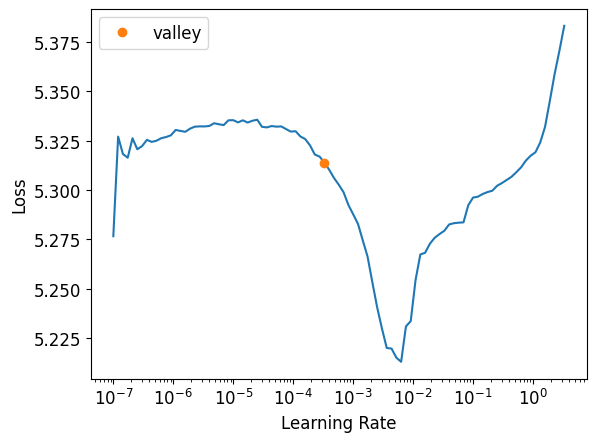

In [29]:
# Configuración del Learner
learn_birdsV2 = Learner(
    dls_birds,
    model_birdsV2,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat(),
    metrics=[accuracy, F1Score(average='weighted')]  # F1Score está incluido
)

# Verificar el resumen del modelo
learn_birdsV2.summary()

# Buscar el mejor Learning Rate
lr_birdsV2 = learn_birdsV2.lr_find()
print(f"Learning Rate sugerido: valley={lr_birds.valley}")


Better model found at epoch 0 with valid_loss value: 5.007307529449463.


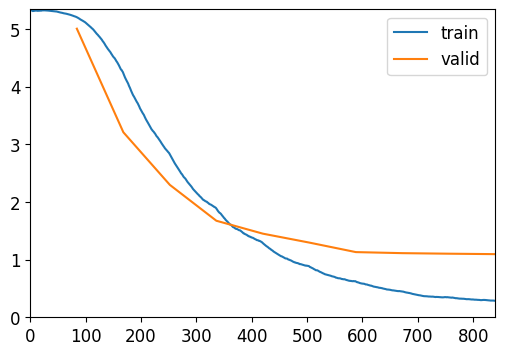

Better model found at epoch 1 with valid_loss value: 3.2102408409118652.


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7edff943fb50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7edff943fb50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Better model found at epoch 2 with valid_loss value: 2.297198534011841.
Better model found at epoch 3 with valid_loss value: 1.6749480962753296.
Better model found at epoch 4 with valid_loss value: 1.450809359550476.
Better model found at epoch 5 with valid_loss value: 1.2957255840301514.
Better model found at epoch 6 with valid_loss value: 1.1308046579360962.
Better model found at epoch 7 with valid_loss value: 1.1126434803009033.
Better model found at epoch 8 with valid_loss value: 1.1031506061553955.
Better model found at epoch 9 with valid_loss value: 1.0954060554504395.


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [30]:
learn_birdsV2.fit_one_cycle(10, lr_max=slice(lr_birdsV2.valley/10, lr_birdsV2.valley), cbs=[
    SaveModelCallback(),
    EarlyStoppingCallback(monitor='valid_loss', patience=3),
    ShowGraphCallback()
])


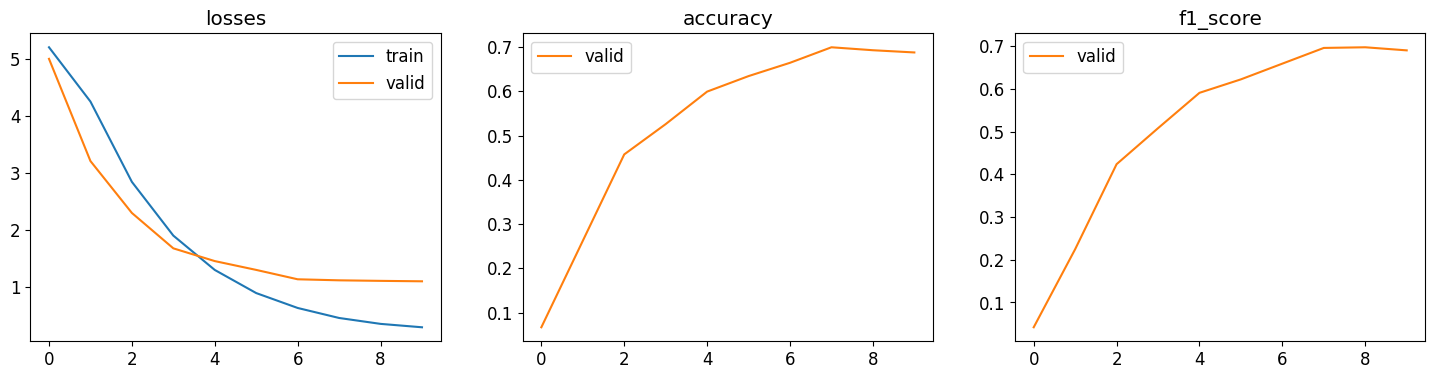

Validation Loss: 1.0954
Validation Accuracy: 0.6878
Validation F1 Score: 0.6907


In [31]:
# Visualización de métricas de entrenamiento y validación
recorder = learn_birdsV2.recorder
recorder.plot_metrics()

# Resultados finales en el conjunto de validación
results_val = learn_birdsV2.validate()

# Extraer y mostrar métricas finales
val_loss, val_accuracy, val_f1 = results_val[0], results_val[1], results_val[2]
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


##### **Análisis y Comparación de Resultados**

Vamos a comparar los resultados obtenidos con el **modelo base** y la versión mejorada con **GELU** y una **capa intermedia**.

---

## **Resultados del Modelo Base**
- **Validation Loss**: **1.1010**  
- **Validation Accuracy**: **0.7245**  
- **Validation F1 Score**: **0.7256**  

---

## **Resultados del Modelo Mejorado**
- **Validation Loss**: **1.0954**  
- **Validation Accuracy**: **0.6878**  
- **Validation F1 Score**: **0.6907**  

---

## **Comparación y Observaciones**

1. **Validation Loss**  
   - La **pérdida de validación** mejoró **ligeramente** en la versión mejorada (**1.0954** vs **1.1010** en el modelo base).  
   - Aunque la diferencia es mínima, indica que la cabecera mejorada estabiliza el aprendizaje, pero no logra una mejora sustancial.

2. **Validation Accuracy**  
   - La **exactitud** disminuyó del **72.45%** en el modelo base a **68.78%** en el modelo mejorado.  
   - Esto sugiere que la cabecera original, más simple, logra una **generalización** superior en el conjunto de validación.

3. **Validation F1 Score**  
   - El **F1 Score** bajó de **0.7256** a **0.6907** en la versión mejorada.  
   - Esto confirma que la versión mejorada no logró un equilibrio tan efectivo entre **precisión** y **recuperación** como el modelo base.

---

## **Interpretación de los Resultados**
- La cabecera mejorada, con una **capa intermedia** y activación **GELU**, incrementa la capacidad de la red, pero en este caso específico, provoca una **ligera pérdida de generalización**.  
- Posibles causas:
   - **Overfitting**: La capa intermedia de 256 neuronas pudo haber sobreajustado al conjunto de entrenamiento.  
   - **Impacto de GELU**: Aunque GELU tiene ventajas teóricas, en este caso práctico, **ReLU** parece generalizar mejor.

---

## **Conclusión**
- El **modelo base** sigue siendo superior en términos de **exactitud** y **F1 Score** en validación.  
---


## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

### **¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?**

---

#### **¿Qué es Grad-CAM?**

Grad-CAM (**Gradient-weighted Class Activation Mapping**) es una técnica de visualización que identifica las regiones de entrada (por ejemplo, áreas de una imagen) que son más relevantes para las predicciones de un modelo basado en redes neuronales convolucionales.

---

#### **¿Cómo funciona Grad-CAM?**

1. **Selección de la capa objetivo**:
   - Se utiliza la última capa convolucional del modelo porque mantiene información espacial que se pierde en las capas densas.

2. **Gradientes ponderados**:
   - Se calculan los gradientes de la salida deseada con respecto a las activaciones de la capa objetivo.
   - Estos gradientes indican qué características de la imagen influyen más en la predicción.

3. **Combinación ponderada**:
   - Los gradientes se usan para ponderar las activaciones de la capa objetivo.
   - Las activaciones ponderadas se suman para generar un mapa de calor que indica las áreas importantes de la imagen.

4. **Superposición con la imagen original**:
   - El mapa de calor se escala y se superpone sobre la imagen original para facilitar la interpretación visual.

---

#### **¿Para qué sirve Grad-CAM?**

1. **Explicabilidad**:
   - Ayuda a entender qué partes de la imagen influyen más en las decisiones del modelo.
   - Esto es crucial en aplicaciones sensibles como la medicina.

2. **Diagnóstico de Problemas**:
   - Si Grad-CAM destaca regiones irrelevantes, indica que el modelo podría estar aprendiendo patrones incorrectos (por ejemplo, sesgos en los datos).

3. **Validación del Modelo**:
   - Permite verificar si el modelo está tomando decisiones basadas en características relevantes.

4. **Generación de Hipótesis**:
   - Grad-CAM puede descubrir patrones inesperados en los datos, lo que puede guiar investigaciones adicionales.

---


In [17]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=a62148306ca745a483f089f40d8db72e0b89fb06762f7418b1e82969f2db35a6
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


### **Uso de Grad-CAM para Analizar el Comportamiento del Modelo**

Grad-CAM (Gradient-weighted Class Activation Mapping) es una técnica que nos permite visualizar cuáles son las regiones más relevantes de una imagen para las predicciones realizadas por un modelo de visión por computador. En este caso, lo aplicamos al modelo ResNet18 que hemos entrenado para la clasificación de aves.

#### **Qué vamos a hacer**
1. Seleccionar la última capa convolucional de ResNet18 como objetivo para generar los mapas de activación.
2. Crear una instancia de Grad-CAM que nos permita generar estos mapas para las imágenes seleccionadas.
3. Elegir un subconjunto de imágenes de prueba para realizar el análisis.

#### **Por qué lo hacemos**
- **Grad-CAM** nos ayuda a entender cómo el modelo toma decisiones, es decir, qué partes de una imagen considera más relevantes para clasificarla en una determinada categoría.
- Esto proporciona explicabilidad, lo cual es útil para evaluar la confianza del modelo y mejorar su interpretación.

#### **Cómo lo hacemos**
El código se estructura en los siguientes pasos:


In [18]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

# Selección de la capa objetivo para Grad-CAM (último bloque convolucional de ResNet18)
target_layer = model_birds.layer4[-1]

# Crear la instancia de Grad-CAM
cam = GradCAM(model=model_birds, target_layers=[target_layer])

# Seleccionar imágenes de prueba para análisis
test_images = files_test[:5]  # Seleccionamos las primeras 5 imágenes


#### **Explicación del Código**

1. **Selección de la Capa Objetivo**:
   - `target_layer` define la última capa convolucional de la arquitectura ResNet18 (`layer4[-1]`).
   - Esta capa es relevante porque contiene las características de más alto nivel que el modelo ha aprendido a extraer.

2. **Creación de la Instancia de Grad-CAM**:
   - Se crea una instancia del objeto `GradCAM`, configurando el modelo entrenado (`model_birds`) y la capa objetivo (`target_layer`).
   - Este objeto será usado para calcular los mapas de activación ponderados por gradiente.

3. **Selección de Imágenes de Prueba**:
   - Seleccionamos las primeras 5 imágenes del conjunto de prueba (`files_test`) para realizar el análisis.
   - Este subconjunto nos permite realizar un análisis representativo sin procesar todas las imágenes del conjunto.

Con este bloque de código, preparamos los elementos necesarios para generar y visualizar los mapas de activación, lo que nos ayudará a evaluar si el modelo está tomando decisiones basadas en características relevantes de las imágenes.


### **Visualización de Mapas de Activación con Grad-CAM**

En este paso, utilizamos Grad-CAM para generar y superponer mapas de activación en imágenes seleccionadas del conjunto de prueba. Este análisis nos permitirá identificar qué regiones de cada imagen el modelo considera más relevantes para su predicción.

#### **Qué vamos a hacer**
1. Cargar y procesar cada imagen seleccionada.
2. Generar el mapa de activación con Grad-CAM.
3. Superponer el mapa en la imagen original.
4. Visualizar y analizar los resultados para cada imagen.


---

Para cada imagen seleccionada:
1. La cargamos con OpenCV y la procesamos para ajustarla al tamaño esperado por el modelo (224x224 píxeles).
2. Preprocesamos la imagen para normalizarla utilizando las estadísticas de ImageNet (media y desviación estándar).
3. Generamos el mapa de activación a partir del tensor de entrada utilizando la instancia `cam`.
4. Superponemos el mapa generado sobre la imagen original para destacar las regiones activadas.
5. Mostramos la imagen con el mapa de activación superpuesto utilizando Matplotlib.


#### **Explicación del Código**

1. **Carga y Procesamiento de Imágenes**:
   - Se carga cada imagen desde su ruta y se convierte de formato BGR (OpenCV) a RGB.
   - La imagen se redimensiona a 224x224 píxeles, y los valores de píxeles se escalan al rango [0, 1].

2. **Preprocesamiento**:
   - Normalizamos la imagen utilizando las estadísticas de ImageNet (media y desviación estándar).
   - Nos aseguramos de que los datos se encuentren en el formato y tipo correctos (`float32`), necesarios para el modelo.

3. **Generación de Mapas de Activación**:
   - Utilizamos Grad-CAM para calcular el mapa de activación basado en los gradientes del último bloque convolucional de ResNet18.
   - Este mapa indica qué regiones de la imagen contribuyen más a la predicción del modelo.

4. **Superposición y Visualización**:
   - Combinamos el mapa de activación con la imagen original para resaltar las áreas de interés.
   - Las imágenes resultantes se muestran junto con el título correspondiente a la imagen procesada.

Este proceso nos permite evaluar visualmente el comportamiento del modelo y validar si las regiones activadas tienen sentido desde una perspectiva humana.


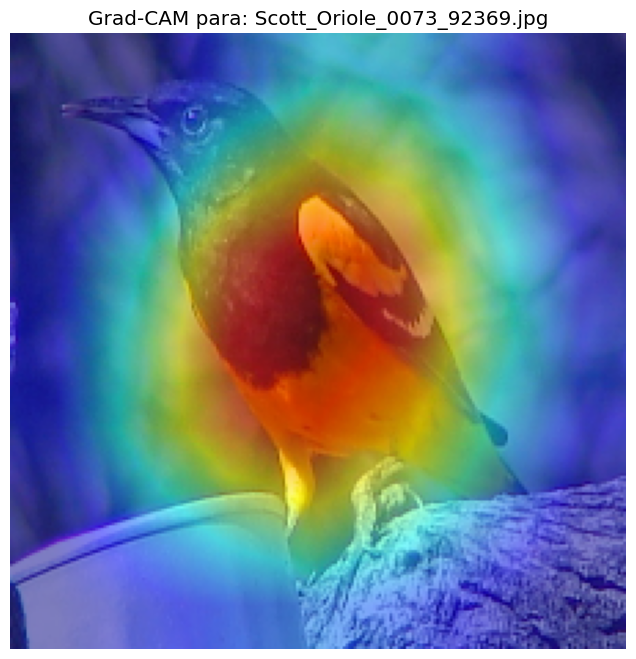

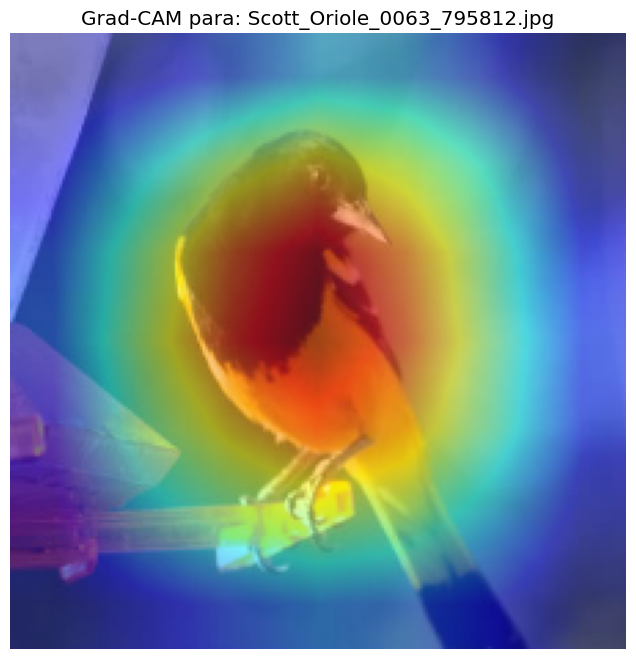

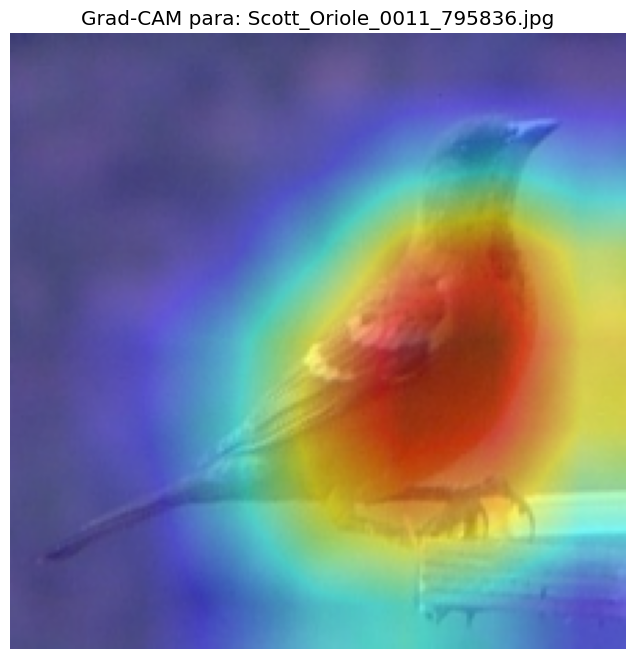

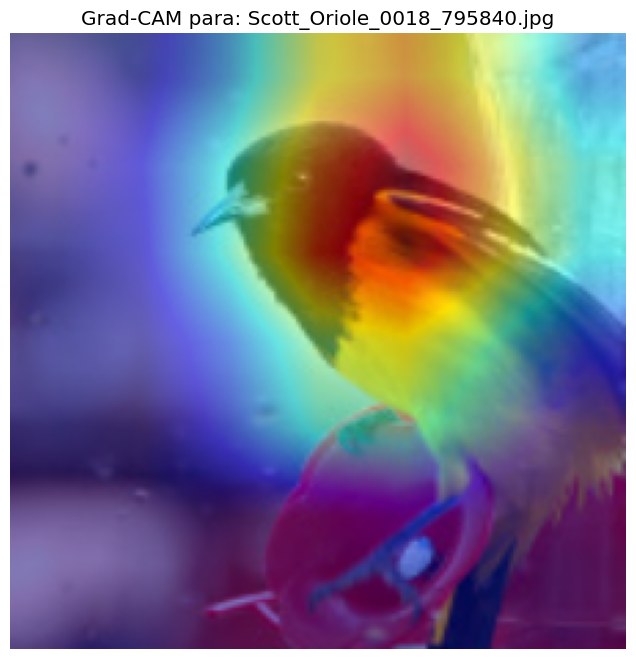

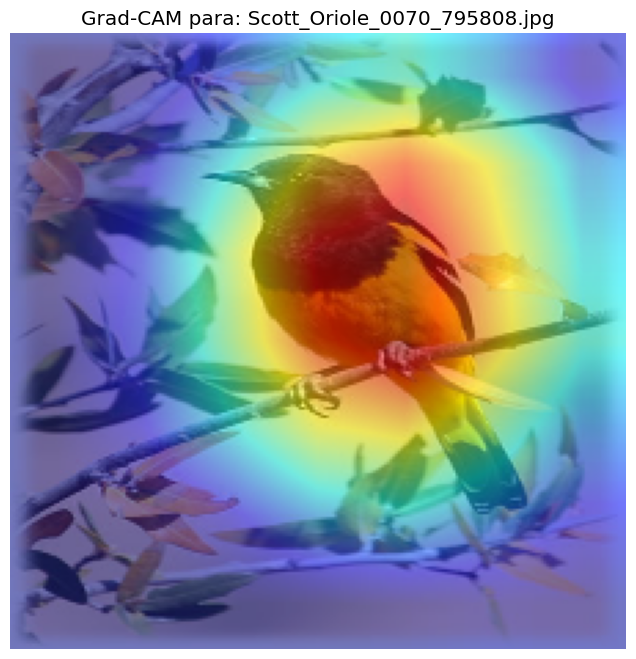

In [19]:
# Importación de librerías necesarias
# cv2 para manejo de imágenes, numpy para operaciones matemáticas y matplotlib para visualizar resultados.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Configuración y preparación de las imágenes de entrada
# Iterar a través de las imágenes seleccionadas en la lista `test_images`.
for img_path in test_images:
    # Leer la imagen desde la ruta `img_path`.
    # cv2.imread carga imágenes en formato BGR por defecto, pero se convierte a RGB.
    img = cv2.imread(str(img_path), 1)[:, :, ::-1]  # Convertir de BGR a RGB

    # Redimensionar la imagen a 224x224 píxeles (tamaño comúnmente utilizado en modelos preentrenados).
    # Normalizar dividiendo por 255.0 para escalar los valores entre 0 y 1.
    img_resized = cv2.resize(img, (224, 224)) / 255.0

    # Preprocesamiento de la imagen para el modelo
    # Aplicar un preprocesamiento que ajusta la imagen a los valores esperados por el modelo.
    # Se normaliza usando la media y desviación estándar típicas de modelos preentrenados (Ej.: ImageNet).
    input_tensor = preprocess_image(
        img_resized,
        mean=[0.485, 0.456, 0.406],  # Media de normalización
        std=[0.229, 0.224, 0.225]   # Desviación estándar de normalización
    )
    # Convertir el tensor preprocesado en un tipo compatible para el modelo (float32).
    input_tensor = input_tensor.squeeze(0).float()

    #  Generación del mapa de activación Grad-CAM
    # Usar Grad-CAM para generar un mapa de activación a partir de la imagen preprocesada.
    # Se añade una dimensión de batch antes de procesar.
    grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0))[0]  # Obtener el mapa de activación en escala de grises.

    # Superposición del mapa de activación sobre la imagen original
    # Combinar el mapa de activación con la imagen redimensionada para resaltarla.
    visualization = show_cam_on_image(img_resized, grayscale_cam, use_rgb=True)

    # Visualización del resultado
    # Mostrar la imagen original con el mapa de activación superpuesto usando matplotlib.
    plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura.
    plt.imshow(visualization)   # Mostrar la imagen compuesta.
    plt.axis('off')             # Ocultar los ejes para una visualización limpia.
    plt.title(f"Grad-CAM para: {img_path.name}")  # Agregar un título indicando el archivo de imagen.
    plt.show()                  # Renderizar la visualización.


### **Analisis de los resultados**

1. Visualización clara:

Las áreas más importantes de cada imagen están bien resaltadas con los colores cálidos (rojo, amarillo), lo que indica que el Grad-CAM está funcionando como se espera.
Las regiones que no son relevantes están representadas en colores más fríos (azul, púrpura), lo que también es consistente con los mapas de activación.

2. Variedad de resultados:

En algunas imágenes, parece que el modelo también considera partes del fondo como relevantes. Esto podría deberse a que el modelo ha aprendido características del entorno junto con el objeto de interés.

3. Interpretación posible:

En general, los mapas muestran que el modelo presta atención a áreas como el cuerpo y la cabeza del ave, lo que es esperable y positivo.